### Stochastic Gradient Descent (SGD)

Stochastic gradient descent (SGD) algorithm is the most well-studied optimization algorithm when it comes to solving large scale optimization problems. Given the following optimization problem:
\begin{equation}
\min_{x\in \mathbb{R}^d}f(x) := \mathbb{E}_{i\sim \mathcal{D}} f_i(x)
\end{equation}
The SGD algorithm performs iterates according to the following rule:
\begin{equation}
\theta_{k+1} = \theta_k - \alpha \nabla f_i(\theta_k) \quad \text{where } i \sim \mathcal{D}
\end{equation}
Here $\alpha>0$ is called the step-size or learning rate and $\theta_0$ is initialized based on some criterion. Often, $\theta_0=0 \in \mathbb{R}^d$. 

### Binary Classification 

Consider a binary classifation problem wherein the task is designing some rule according to which two seperate class of nodes could be separated. Let us generate two class of nodes in $\mathbb{R}^2$ using sklearn. (Please run the last cell first, if you wish the plots to be drawn at the center)

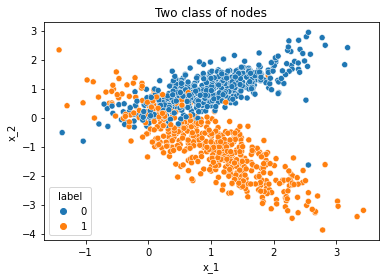

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

X,y = make_classification(n_samples= 1000,
                                   n_features=2,
                                   n_redundant=0,
                                   n_clusters_per_class=1,
                                   weights=[.5],
                                   class_sep = 1,  # how separate the classes are
                                   random_state =1)

X = pd.DataFrame(X, columns=['x_1', 'x_2'])
X['label'] = y
sns.scatterplot(data=X, x="x_1", y="x_2", hue=X['label'])
plt.title('Two class of nodes')
plt.show()


One way to find the classifier that separates these two set of nodes is via minimizing the logistic expected loss function. Recall that logisitc loss function is constructed as follows:
\begin{equation}
\ell(\theta, (x,y)) : = \log(1+\exp(-y\theta^Tx))
\end{equation}
We then aim to solve the following optimization problem: 
\begin{equation}
f(\theta, b):=\mathbb{E}_{(x,y)\sim \mathcal{D}} \ell(\theta, (x,y))
\end{equation}
Miniminizing $f(\theta,b)$ when $y\in \{0,1\}$ amounts to letting $y=0$ when $\theta^Tx<0$, and $y=1$ when $\theta^Tx>0$. Note that here for clarity, we have assumed that the bias term is equal to 0. In other words, the optimal linear classifier shall pass through the origin. To simplify things further, we can assume that the $y$ variable is always equal to 0. To this end, we just need to fold the data in a way that the orange points tranlsate to their negation. See the following figure:

<ipython-input-143-db4572652a80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_folded['x_2'][X_folded['label'] == 1] = -X_folded['x_2']


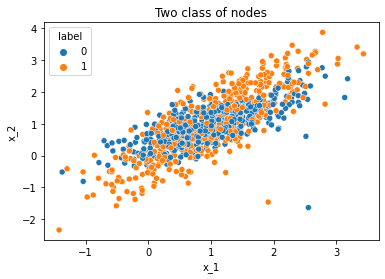

In [143]:
X_folded= X.copy()
X_folded['x_2'][X_folded['label'] == 1] = -X_folded['x_2']

sns.scatterplot(data=X_folded, x="x_1", y="x_2", hue=X['label'])
plt.title('Two class of nodes')
plt.show()


Henceforth, we assume that all the labels are equal to $0$ and we denote the resulting distribution on the data after folding by $\mathcal{D}^*$. In this event, letting $\theta_0=0$ and applying SGD to solve this optimization problem, we get:
\begin{equation}
\theta_{k+1} = \theta_k +  \frac{\alpha x_k}{1+\exp(x_k^T\theta_k)}
\end{equation}
Here $x_k$ is the $k^{th}$ chosen data point from distribution $\mathcal{D}^*$. Next, following the spirit of support vector machine theory, we propose the following stopping criterion for the SGD algorithm. We terminate the algorithm, if:
\begin{equation}
\theta_k^T\zeta_k \geq 1.
\end{equation}
Below, we implement this algorithm in $\mathbb{R}^2$.  

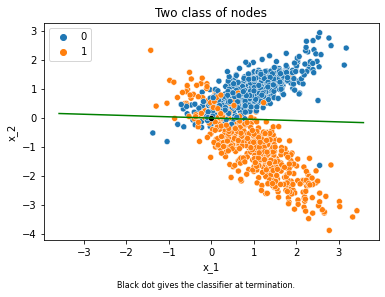

In [194]:
import numpy as np
import time 

Theta  = pd.DataFrame(0, index=np.arange(1000), columns=['x_1','x_2', 'inners'])
alpha = .01
data = X
theta = np.zeros(2)
i = 0
run = True

while run:

    x = np.array(X.loc[i][:2])
    inner = np.inner(theta, x)
    
    Theta.loc[i, ['x_1','x_2']] =theta
    Theta.loc[i, 'inners']= inner
    
#     print(theta)

    if inner > 1:
        run = False
        last_iter = i
        break
    else:
        theta += alpha*x/(1+np.exp(inner))
    i += 1

sns.scatterplot(data=X, x="x_1", y="x_2", hue=X['label'])
sns.scatterplot(data=Theta.tail(1), x='x_1',y='x_2', color='black')
plt.plot([-10*theta[0],10*theta[0]], [-10*theta[1],10*theta[1]], color='green')
txt="Black dot gives the classifier at termination."
plt.figtext(0.5, -.04, txt, wrap=True, horizontalalignment='center', fontsize=8)
plt.title('Two class of nodes')
plt.show()

In [195]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")